In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
data = pd.read_csv('/content/Customer-Churn-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

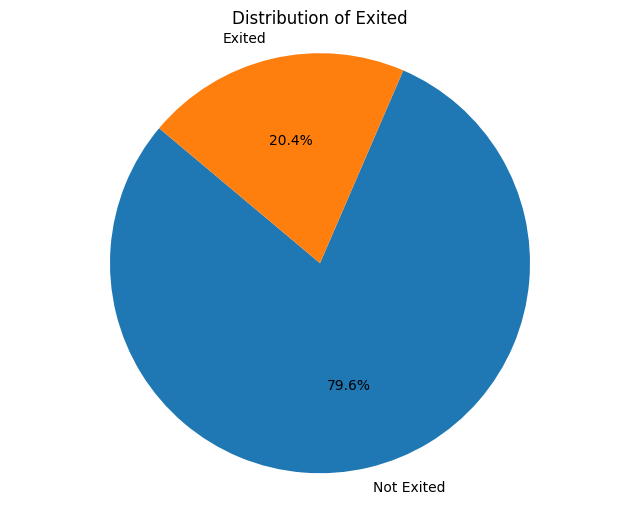

In [18]:
exit_counts = data['Exited'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(exit_counts, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Exited')
plt.axis('equal')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Card Type'] = label_encoder.fit_transform(data['Card Type'])

X = data.drop(columns=['Exited'])
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [ ]:
data.describe()

In [ ]:
data.info()

In [17]:
data.dropna(inplace=True)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

In [21]:
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"Best Model: {best_model} with Accuracy: {best_accuracy}")

Logistic Regression Accuracy: 0.7983333333333333
Random Forest Accuracy: 0.9986666666666667
Gradient Boosting Accuracy: 0.998
Support Vector Machine Accuracy: 0.8053333333333333
Best Model: RandomForestClassifier() with Accuracy: 0.9986666666666667


In [22]:
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

               Feature  Importance
10            Complain    0.835195
3                  Age    0.055281
6        NumOfProducts    0.044446
5              Balance    0.012117
8       IsActiveMember    0.010814
13        Point Earned    0.008479
9      EstimatedSalary    0.008005
0          CreditScore    0.007949
4               Tenure    0.004403
1            Geography    0.004229
2               Gender    0.002921
11  Satisfaction Score    0.002889
12           Card Type    0.002384
7            HasCrCard    0.000888


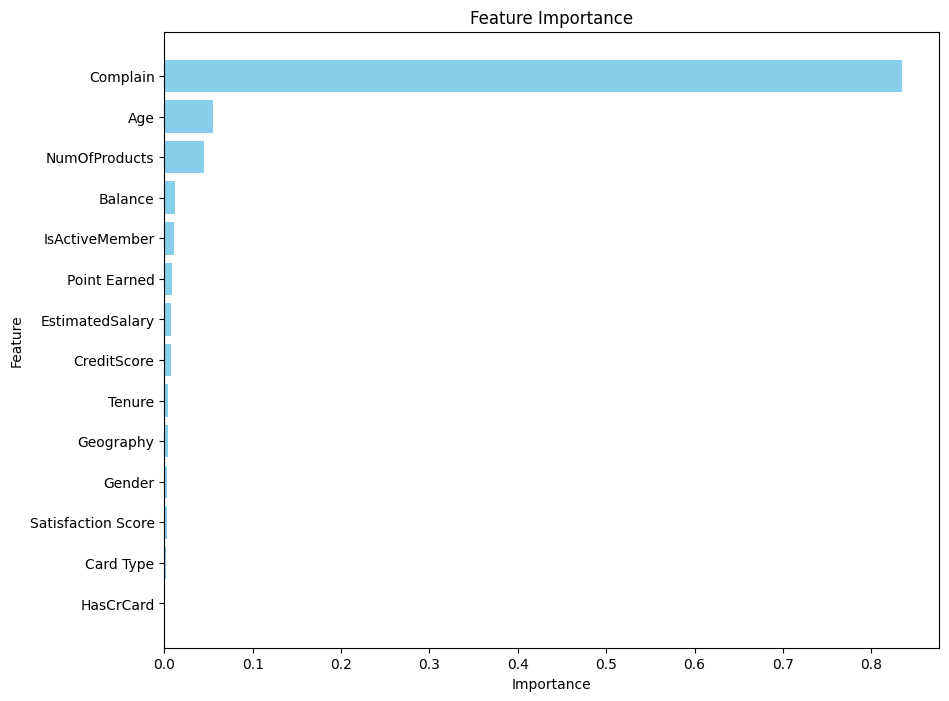

In [23]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [25]:
top_feature_names = ['Complain', 'Age', 'NumOfProducts', 'Balance', 'IsActiveMember', 'Point Earned', 'EstimatedSalary', 'CreditScore', 'Tenure', 'Geography', 'Gender']
top_features_df = data[top_feature_names]

X_new = top_features_df
y_new = data['Exited']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

rf_model_new = RandomForestClassifier()
rf_model_new.fit(X_train_new, y_train_new)

y_pred_new = rf_model_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"Random Forest Model Accuracy with Top Features: {accuracy_new}")

Random Forest Model Accuracy with Top Features: 0.9986666666666667


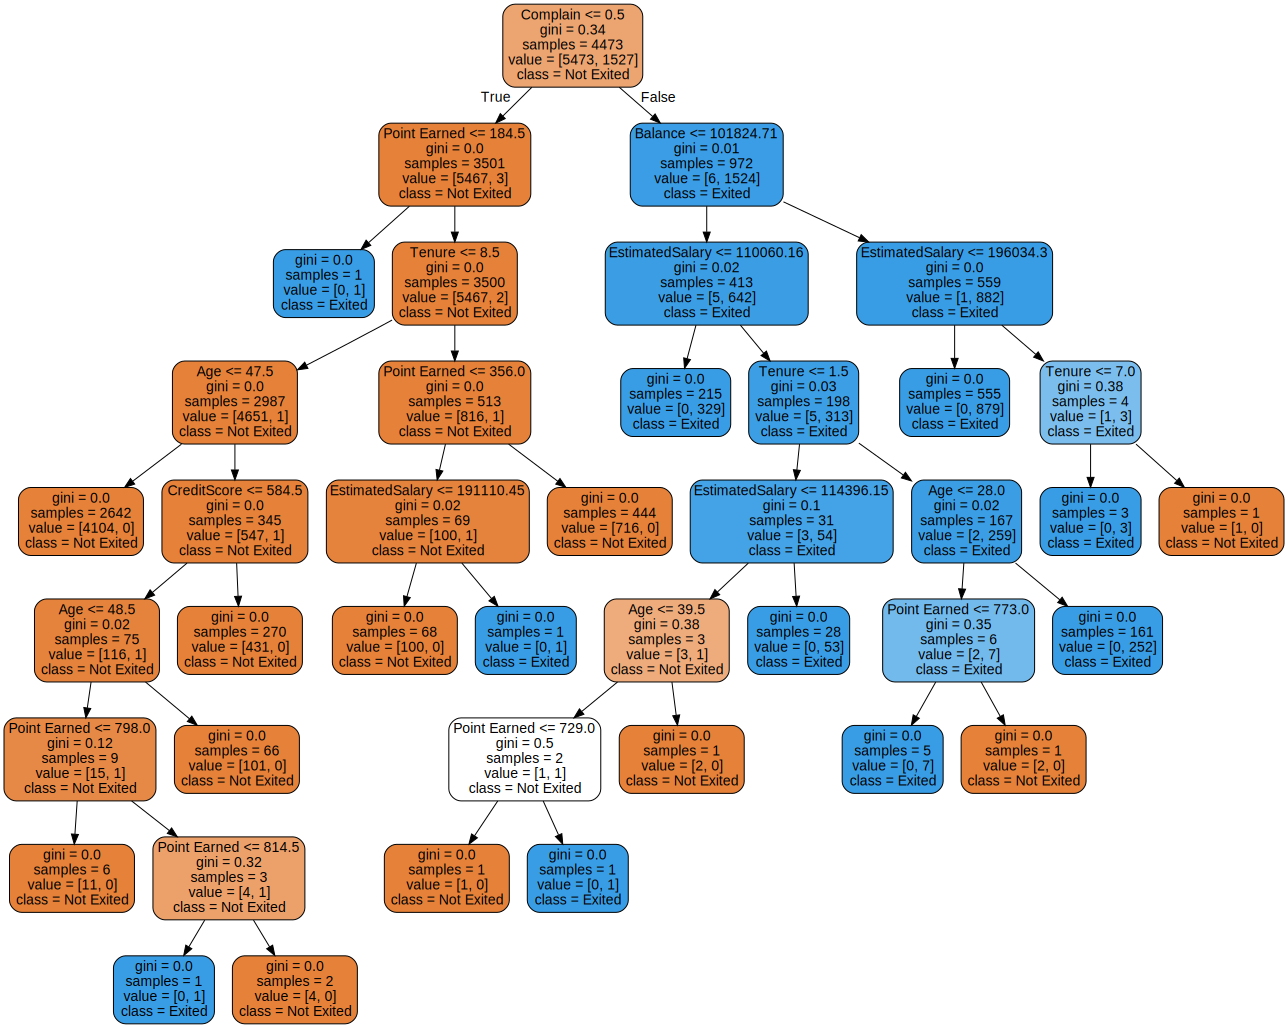

In [33]:
from sklearn.tree import export_graphviz
import graphviz

tree = rf_model_new.estimators_[0]
export_graphviz(tree, out_file='tree.dot',
                feature_names = top_feature_names,
                class_names = ['Not Exited', 'Exited'],
                rounded = True, proportion = False,
                precision = 2, filled = True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [34]:
from sklearn.model_selection import cross_val_score

scores_new = cross_val_score(rf_model_new, X_new, y_new, cv=5)

print("Cross-validation scores (new model):", scores_new)
print("Mean accuracy (new model):", scores_new.mean())

Cross-validation scores (new model): [0.995 1.    1.    1.    0.998]
Mean accuracy (new model): 0.9986


In [39]:
# Hyperparameter tuning

In [67]:
model_mk3 = RandomForestClassifier(max_depth=6, min_samples_split=3, min_samples_leaf=2)
model_mk3.fit(X_train_new, y_train_new)

accuracy = model_mk3.score(X_test_new, y_test_new)
print("Accuracy of tuned model:", accuracy)

Accuracy of tuned model: 0.9986666666666667


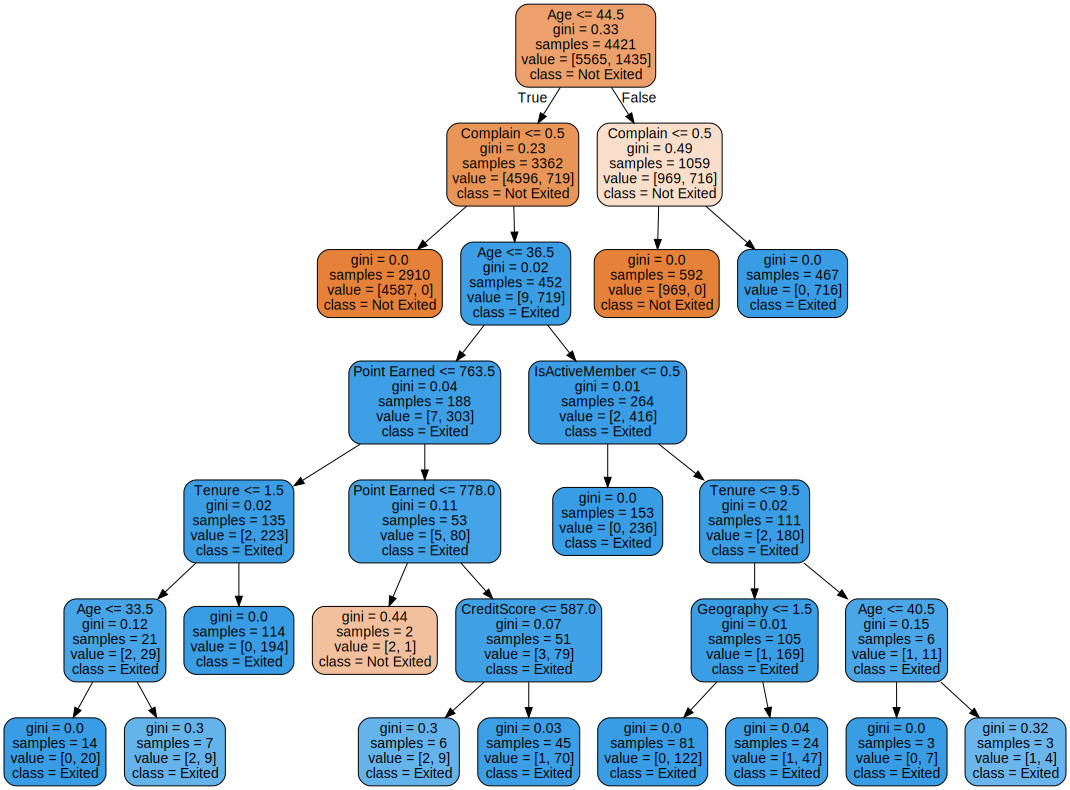

In [42]:
tree_mk3 = model_mk3.estimators_[0]
export_graphviz(tree_mk3, out_file='tree_mk3.dot',
                feature_names = top_feature_names,
                class_names = ['Not Exited', 'Exited'],
                rounded = True, proportion = False,
                precision = 2, filled = True)

with open('tree_mk3.dot') as f:
    dot_graph_mk3 = f.read()
graphviz.Source(dot_graph_mk3)

In [68]:
import joblib

filename = 'model_mark3.pkl'
joblib.dump(model_mk3, filename)

print("Model saved as", filename)

Model saved as model_mark3.pkl


In [43]:
def get_input():
    complain = int(input("Enter Complain (0 or 1): "))
    age = int(input("Enter Age: "))
    num_of_products = int(input("Enter NumOfProducts: "))
    balance = float(input("Enter Balance: "))
    is_active_member = int(input("Enter IsActiveMember (0 or 1): "))
    point_earned = float(input("Enter Point Earned: "))
    estimated_salary = float(input("Enter EstimatedSalary: "))
    credit_score = int(input("Enter CreditScore: "))
    tenure = int(input("Enter Tenure: "))
    geography = int(input("Enter Geography (0 for France, 1 for Germany, 2 for Spain): "))
    gender = int(input("Enter Gender (0 for Female, 1 for Male): "))

    user_input = {
        'Complain': complain,
        'Age': age,
        'NumOfProducts': num_of_products,
        'Balance': balance,
        'IsActiveMember': is_active_member,
        'Point Earned': point_earned,
        'EstimatedSalary': estimated_salary,
        'CreditScore': credit_score,
        'Tenure': tenure,
        'Geography': geography,
        'Gender': gender
    }

    return pd.DataFrame([user_input])

user_input_df = get_input()

prediction = model_mk3.predict(user_input_df)

if prediction[0] == 1:
    print("The model predicts that the customer will churn.")
else:
    print("The model predicts that the customer will not churn.")


Enter Complain (0 or 1): 0
Enter Age: 68
Enter NumOfProducts: 2
Enter Balance: 130169.27	
Enter IsActiveMember (0 or 1): 1
Enter Point Earned: 882
Enter EstimatedSalary: 93112.20	
Enter CreditScore: 834
Enter Tenure: 9
Enter Geography (0 for France, 1 for Germany, 2 for Spain): 1
Enter Gender (0 for Female, 1 for Male): 0
The model predicts that the customer will not churn.


In [31]:
top_features_df[5000:5005]

,Complain,Age,NumOfProducts,Balance,IsActiveMember,Point Earned,EstimatedSalary,CreditScore,Tenure,Geography,Gender
5000,0,68,2,130169.27,1,882,93112.20,834,9,1,0
5001,0,35,2,0.00,1,474,9658.41,754,4,2,1
5002,1,43,2,81076.80,1,253,182627.25,590,7,0,1
5003,0,36,1,0.00,1,466,13177.40,740,7,0,1
5004,1,57,1,101465.31,0,882,43568.31,502,3,1,0


In [61]:
def predict_customer_churn(model, input_row, feature_names):
    input_row = input_row.values.reshape(1, -1)
    input_df = pd.DataFrame(input_row, columns=feature_names)
    prediction = model.predict(input_df)

    if prediction[0] == 1:
        print("The model predicts that the customer will churn.")
    else:
        print("The model predicts that the customer will not churn.")

In [62]:
top_features_df.iloc[600]

Complain                1.00
Age                    43.00
NumOfProducts           3.00
Balance                 0.00
IsActiveMember          1.00
Point Earned          343.00
EstimatedSalary    110916.15
CreditScore           601.00
Tenure                  8.00
Geography               0.00
Gender                  0.00
Name: 600, dtype: float64

In [63]:
predict_customer_churn(model_mk3,top_features_df.iloc[600] , top_feature_names)

The model predicts that the customer will churn.


In [64]:
top_features_df.iloc[9990]

Complain               0.00
Age                   33.00
NumOfProducts          1.00
Balance            35016.60
IsActiveMember         0.00
Point Earned         791.00
EstimatedSalary    53667.08
CreditScore          714.00
Tenure                 3.00
Geography              1.00
Gender                 1.00
Name: 9990, dtype: float64

In [65]:
predict_customer_churn(model_mk3,top_features_df.iloc[9990] , top_feature_names)

The model predicts that the customer will not churn.
